## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DL_projects/Malaria detection/Dataset/Train'
valid_path = '/content/drive/MyDrive/DL_projects/Malaria detection/Dataset/Test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/DL_projects/Malaria detection/Dataset/Train/*')

In [8]:
folders

['/content/drive/MyDrive/DL_projects/Malaria detection/Dataset/Train/Parasite',
 '/content/drive/MyDrive/DL_projects/Malaria detection/Dataset/Train/Uninfected']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [10]:
#dding output layer 
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DL_projects/Malaria detection/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DL_projects/Malaria detection/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 161s 10s/step - loss: 2.1695 - accuracy: 0.4635 - val_loss: 0.6082 - val_accuracy: 0.7015
Epoch 2/50
13/13 [==============================] - 6s 453ms/step - loss: 0.8617 - accuracy: 0.5701 - val_loss: 0.6908 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 6s 453ms/step - loss: 0.6755 - accuracy: 0.6447 - val_loss: 0.6991 - val_accuracy: 0.6194
Epoch 4/50
13/13 [==============================] - 6s 453ms/step - loss: 0.4998 - accuracy: 0.7632 - val_loss: 0.5098 - val_accuracy: 0.7612
Epoch 5/50
13/13 [==============================] - 6s 450ms/step - loss: 0.3992 - accuracy: 0.7919 - val_loss: 0.4569 - val_accuracy: 0.7090
Epoch 6/50
13/13 [==============================] - 6s 454ms/step - loss: 0.3309 - accuracy: 0.8548 - val_loss: 0.3890 - val_accuracy: 0.7910
Epoch 7/50
13/13 [==============================] - 6s 455ms/step - loss: 0.2838 - accuracy: 0.9011 - val_loss: 0.4168 - val_accuracy: 0.8209
Epoch 

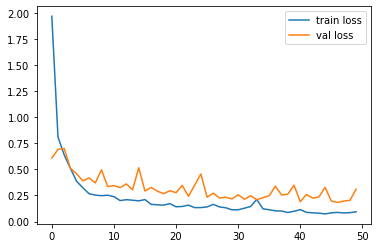

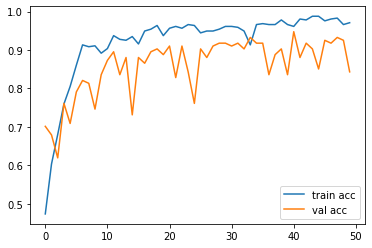

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[7.12675452e-01, 2.87324548e-01],
       [4.67294395e-01, 5.32705605e-01],
       [7.70126820e-01, 2.29873180e-01],
       [6.52316213e-01, 3.47683728e-01],
       [9.99134004e-01, 8.66079237e-04],
       [9.99051034e-01, 9.48913686e-04],
       [9.01340544e-01, 9.86594632e-02],
       [9.99747932e-01, 2.52076628e-04],
       [6.25096381e-01, 3.74903589e-01],
       [4.10250753e-01, 5.89749277e-01],
       [1.29271401e-02, 9.87072825e-01],
       [1.28291547e-02, 9.87170875e-01],
       [9.76993740e-01, 2.30062362e-02],
       [9.51907218e-01, 4.80927639e-02],
       [9.32631195e-01, 6.73688427e-02],
       [8.20541084e-01, 1.79458886e-01],
       [4.58373576e-01, 5.41626394e-01],
       [7.50604039e-03, 9.92493987e-01],
       [9.99797046e-01, 2.02937619e-04],
       [9.98408973e-01, 1.59108965e-03],
       [3.88823420e-01, 6.11176610e-01],
       [3.54383476e-02, 9.64561582e-01],
       [1.40426368e-01, 8.59573603e-01],
       [9.84676257e-02, 9.01532352e-01],
       [5.957459

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0])

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_vgg19.h5')

In [27]:
img=image.load_img('/content/drive/MyDrive/DL_projects/Malaria detection/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [28]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [29]:
x.shape

(224, 224, 3)

In [30]:
x=x/255

In [31]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:
model.predict(img_data)

array([[0.15357511, 0.8464249 ]], dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data), axis=1)

In [34]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
